# **Введение в ансамбли: бэггинг. Случайный лес**

✍ Одна модель хорошо, а много — лучше! С этой фразы мы с вами приоткрываем дверь в удивительный мир ансамблевых моделей.

**Ансамблевые модели** или просто **ансамбли (ensembles)** — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

Ансамбли — передовые алгоритмы для решения сложных задач машинного обучения. Сегодня **они и нейронные сети являются главными конкурентами** и дают наилучшие результаты, благодаря чему используются крупными компаниями в продакшене.

В этом модуле мы коснёмся основой идеи использования ансамблей на примере бэггинга и посмотрим на его реализацию для решения задач классификации в библиотеке sklearn, а в дальнейшем разберёмся, что за математическая «магия» стоит за ансамблевыми методами.

Говоря простыми словами, ансамбли — это объединение простых моделей в одного гиганта. Но объединять модели можно как угодно: например, взять тысячу разных логистических регрессий, а затем на их предсказаниях построить дерево решений, линейную регрессию или вообще нейронную сеть. А можно обучить сотню деревьев решений — построить целый лес, а для предсказания взять среднее. Вариаций объединения может быть сколько угодно.

Существует три проверенных способа построения ансамблей:

* **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
* **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
* **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.
  
Об ансамблях типов бустинг и стекинг мы поговорим чуть позже в модуле, посвящённом продвинутым методам машинного обучения. В этом модуле разберёмся, что из себя представляет бэггинг и причём тут деревья решений.

## **БЭГГИНГ. ОСНОВНЫЕ ИДЕИ**

В 1906 г. в городе Плимут (Великобритания) на сельской ярмарке был проведён эксперимент. Фрэнсис Гальтон в качестве развлечения посетителей ярмарки предложил им на глаз оценить вес выставленного на всеобщее обозрение быка. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далёких от скотоводческих дел. Собрав после этой ярмарки все результаты, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов. Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю. То есть ответ публики был точнее, чем ответ отдельно взятого эксперта, например мясника или скотовода.

По схожему принципу «голосования толпы» и работает бэггинг.

**Бэггинг (bagging) —** это алгоритм построения ансамбля путём **параллельного обучения множества** независимых друг от друга **моделей**.

В основе алгоритма лежит статистический метод, который называется **бутстрэпом (bootstrap)**. Идея бутстрэпа заключается в генерации  выборок размера  (бутстрэп-выборок) из исходного набора данных размера  путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Схематично работу метода можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/0b100011fed3a80e7f7596055522f064/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-6_1.png)

Мы взяли исходный набор данных размером **n = 12** наблюдений и сгенерировали **k = 3** бутстрэп-выборки размером **m = 8** наблюдений. Обратите внимание, что наблюдения в выборках могут повторяться.

В частном случае можно генерировать выборки того же размера, то есть **n = m**. Таким образом, мы из набора данных создаём  датасетов из исходного того же размера.

*Примечание. Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.*

Давайте обучим ***k*** одинаковых моделей на каждой из сгенерированных выборок, сделаем предсказания, а затем усредним их. Так мы получим бэггинг.

Схематично такой подход можно описать следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/b23d34a62f3b022b7dcd243bd73e0888/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-6_2.png)

**Примечание. В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов, а не арифметическое среднее). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.**
***

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется базовой моделью (base model). Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

Когда мы будем разбирать математическое обоснование ансамблей, мы докажем следующие два утверждения:

* Смещение (bias) бэггинг-ансамбля не больше () смещения одного алгоритма из этого ансамбля.
* Однако разброс (variance) бэггинг-ансамбля в  раз меньше, чем разброс одного алгоритма из ансамбля, где  — количество алгоритмов в ансамбле.
  
Что это значит в переводе с математического?

Теорема гарантирует, что средняя ***ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже.***

Это очень важно для моделей, склонных к переобучению, таких как глубокие деревья решений.

***
## **СЛУЧАЙНЫЙ ЛЕС**

**Случайный лес (Random Forest)** — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

Помимо бутстрэпа, случайный лес использует [**метод случайных подпространств**](https://en.wikipedia.org/wiki/Random_subspace_method). Суть этого метода заключается в том, что **каждая модель обучается не на всех признаках**, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

**АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ**

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

1. С помощью бутстрэпа создать K наборов данных размера (N, M).
2. Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
3. На каждом наборе данных обучить K деревьев решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

Ниже приведена схема работы описанного алгоритма для решения задачи классификации. Для простоты лес состоит из четырёх деревьев (K=4).

![](https://lms.skillfactory.ru/assets/courseware/v1/e48c1363671a7845fdc81605fbf40159/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-6_3.png)

Давайте посмотрим, как работает алгоритм случайного леса, на примере. 

Пусть у нас есть набор данных со следующими факторами:

* x1 — возраст,
* x2 — группа крови,
* x3 — доход в тысячах рублей.

**Целевой признак (y)** — подвергался ли человек операции хотя бы раз в жизни (1 — да, 0 — нет).

Тогда, если мы обучим алгоритм случайного леса на представленных данных, мы получим следующую картину:

![](https://lms.skillfactory.ru/assets/courseware/v1/6bef68296de0ff86175e359672f50742/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-6_4.png)

Количество объектов в наборе данных N=5, а количество факторов — M=3 (+1 целевой признак, его мы не включаем в размерность). Таким образом, размер таблицы наблюдений — (5, 3). Количество деревьев в лесу K=4.

1. На первом этапе алгоритма мы формируем K=4 бутстрэп выборки размером (5, 3), выбирая из таблицы строки случайным образом с возможностью повторения.
2. На втором этапе мы случайным образом выбираем L=2 признаков из каждой таблицы и получаем четыре выборки размером (5, 2).
3. На третьем этапе мы обучаем K=4 деревьев решений, каждое на своей выборке.

*Обратите внимание, что деревья, из которых состоит лес, могут быть различной глубины и структуры в зависимости от того, насколько просто была разделима поданная выборка.*

Теперь, когда поступят новые данные, нам останется только подать их на вход каждого из деревьев, получить предсказания, а затем усреднить их путём мажоритарного голосования и получить ответ:

![](https://lms.skillfactory.ru/assets/courseware/v1/1d01934c9e2ee5c1b5cd0cb74b3646bc/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-6_5.png)

Теперь, когда мы рассмотрели принцип работы случайного леса, давайте посмотрим, как выглядит реализация алгоритма в sklearn.

***
## **СЛУЧАЙНЫЙ ЛЕС В SKLEARN**

Конечно же, ансамблевые алгоритмы вручную пишут очень редко. Для этого есть библиотеки, такие как sklearn. 

В sklearn все ансамблевые методы реализованы в модуле **ensemble**. Давайте импортируем его:

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

#модели деревьев решения
from sklearn import tree 

# импорт модуля для ансамблей
from sklearn import ensemble

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


По традиции сначала построим модель на двух признаках (Glucose и BMI) и посмотрим, как будет выглядеть разделяющая поверхность случайного леса.

In [3]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

В библиотеке sklearn модель случайного леса для решения задачи классификации реализована в классе **RandomForestClassifier**.

**Основные параметры RandomForestClassifier**

* **n_estimators** — количество деревьев в лесу (число K из бэггинга; по умолчанию равно 100);
* **criterion** — критерий информативности разбиения для каждого из деревьев ('gini' — критерий Джини и 'entropy' — энтропия Шеннона; по умолчанию — 'gini');
* **max_depth** — максимальная глубина одного дерева (по умолчанию — None, то есть глубина дерева не ограничена);
* **max_features** — максимальное число признаков, которые будут использоваться каждым из деревьев (число L из метода случайных подпространств; по умолчанию — 'sqrt'; для обучения каждого из деревьев используется ***корень из m*** признаков, где ***m*** — число признаков в начальном наборе данных);
* **min_samples_leaf** — минимальное число объектов в листе (по умолчанию — 1);
* **random_state** — параметр, отвечающий за генерацию случайных чисел.

***

Давайте создадим лес из 500 деревьев решений с максимальной глубиной 3. В качестве критерия информативности будем использовать энтропию. Число признаков в каждом дереве будем вычислять как корень из m.

Затем обучим модель случайного леса с помощью метода **fit()**, сделаем предсказание классов с помощью метода **predict()** и рассчитаем метрики.

In [4]:
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=3, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       493
           1       0.73      0.57      0.64       264

    accuracy                           0.78       757
   macro avg       0.76      0.73      0.74       757
weighted avg       0.77      0.78      0.77       757



Можем построить разделяющую поверхность нашего леса, воспользовавшись функцией **plot_probabilities_2d()**:

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Роман\AppData\Local\Temp\ipykernel_13108\2081044028.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = fig.colorbar(contour)


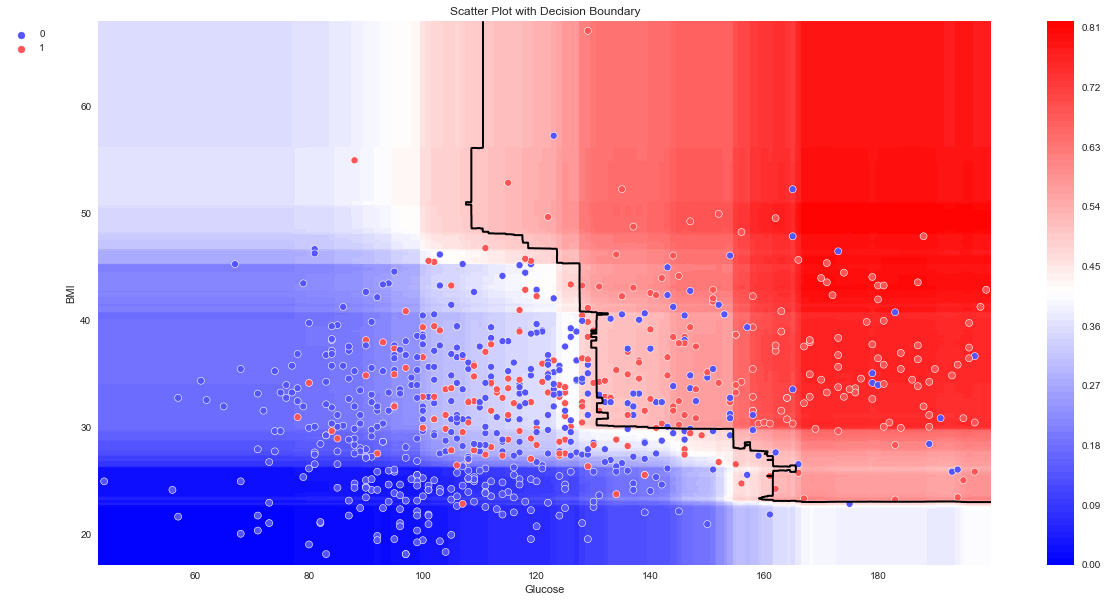

In [6]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (20, 10))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость (линию, где вероятность равна 0.5)
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
plot_probabilities_2d(X, y, rf_clf_2d)

In [7]:
# А теперь используем для предсказания все признаки из набора данных:

#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
 
 
#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



Если мы захотим предсказывать не классы, а вероятности, чтобы, например, подобрать оптимальный порог вероятности, то сработает уже знакомый нам метод **predict_proba()**:

In [8]:
rf_clf_full.predict_proba(X)

array([[0.7186633 , 0.2813367 ],
       [0.85222366, 0.14777634],
       [0.88358167, 0.11641833],
       ...,
       [0.28908312, 0.71091688],
       [0.44280536, 0.55719464],
       [0.94476689, 0.05523311]])

Метод возвращает вероятности принадлежности к классам 0 и 1 (отсутствие и наличие диабета соответственно) для каждого объекта из выборки.

К сожалению, визуализировать построенный лес в виде дерева, как и построить разделяющую поверхность леса, не получится. Это утверждение относится ко всем ансамблевым алгоритмам. Человеку сложно понять, по какому принципу ансамбль принимает решение. Это один из основных их недостатков. 

Однако так как случайный лес основан на деревьях решения, у него также есть атрибут **feature_importances_**, в котором находится коэффициенты важности каждого из признаков. Давайте построим столбчатую диаграмму, иллюстрирующую показатели важности для каждого признака.

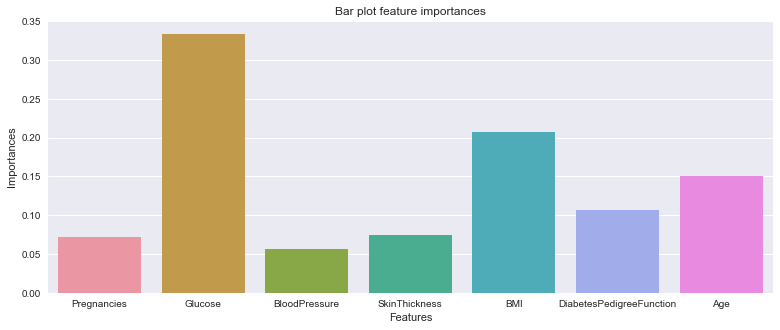

In [10]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

Обратите внимание, что важность признаков для одного дерева и леса из деревьев могут отличаться. Случайный лес даёт более объективную картину об информативности признаков, так как информативность считается не по одному дереву, а по всей совокупности ансамбля.

***
## **ЗАДАЧИ**

Скачайте [**набор данных о винах**](https://lms.skillfactory.ru/assets/courseware/v1/4df69b20d6ac3198d37f55cbd964c1ab/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/winequality-red.zip). Вам необходимо будет предсказать качество вина по его характеристикам.

Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. Хорошим вином будем называть вино, параметр **quality** которого  6, плохим — всё остальное.

In [11]:
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [12]:
# Затем разделим выборку на тренировочную и тестовую:

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите на тренировочной выборке (X_train, y_train) модель случайного леса, состоящего из 500 деревьев. Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. В качестве критерия информативности используйте критерий Джини. Количество признаков, на которых обучается каждое из деревьев, возьмите как **корень из m**, где ***m*** — общее количество признаков. В качестве значения параметра random_state возьмите число 42.

Сделайте предсказание качества вина для тренировочного и тестового наборов данных.

Рассчитайте метрику accuracy для каждого набора и запишите её в качестве ответа с точностью до двух знаков после точки-разделителя.

In [17]:
#Создаём объект класса RandomForestClassifier
wine_forest = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10,
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)


#Обучаем модель
wine_forest.fit(X_train, y_train)


#Делаем предсказание класса train
y_pred_train = wine_forest.predict(X_train)
#Выводим отчёт о метриках
print(metrics.accuracy_score(y_train, y_pred_train).round(2))

#Делаем предсказание класса test
y_pred_test = wine_forest.predict(X_test)
#Выводим отчёт о метриках
print(metrics.accuracy_score(y_test, y_pred_test).round(2))

0.85
0.75
